In [2]:
# stdlib
import sys
import warnings

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import TimeSeriesSurvivalDataLoader

log.add(sink=sys.stderr, level="INFO")
warnings.filterwarnings("ignore")

Mi modelo

# Preprocesamiento de los datos

In [3]:
import pandas as pd
df =  pd.read_csv('generative_input/input_onehot_encoding.csv')
adm = pd.read_csv('./data/data_preprocess_nonfilteres.csv')
res = pd.merge(adm[["HOSPITAL_EXPIRE_FLAG","SUBJECT_ID","HADM_ID","DOB"]],df, on=["SUBJECT_ID","HADM_ID"], how='right')
# Limitar las fechas a un rango permitido

# Ahora deberías poder restar las fechas sin problemas

res['ADMITTIME'] = pd.to_datetime(res['ADMITTIME'])
#res['DOB'] = pd.to_datetime(res['DOB'], format='%Y-%m-%d %H:%M:%S')
#res['DOB'] = pd.to_datetime(res['DOB'])


res = res.fillna(0)
outcome =  res.groupby('SUBJECT_ID')['HOSPITAL_EXPIRE_FLAG'].max()

print(outcome.shape)

(44952,)


In [4]:


print(res.shape, adm.shape, df.shape)
# Assuming df is your DataFrame

# Find columns that contain 'unnamed' in their name
cols_to_drop = res.filter(like='Unnamed', axis=1).columns
res.drop(cols_to_drop, axis=1, inplace=True)
print(res.shape, adm.shape, df.shape)

print(res.isnull().sum().sum())
res = res.fillna(0)
print(res.isnull().sum().sum())

(56678, 691) (58976, 41) (56678, 689)
(56678, 690) (58976, 41) (56678, 689)
0
0


loader = TimeSeriesSurvivalDataLoader(
    temporal_data=temporal_surv,
    observation_times=temporal_surv_horizons,
    static_data=static_surv,
    T=T,
    E=E,
    time_horizons=time_horizons,
)

loader.dataframe()

In [5]:
res.columns

Index(['HOSPITAL_EXPIRE_FLAG', 'SUBJECT_ID', 'HADM_ID', 'DOB', 'ADMITTIME',
       '1_diagnosis', '2_diagnosis', '3_diagnosis', '4_diagnosis',
       '5_diagnosis',
       ...
       'RELIGION_Otra', 'RELIGION_UNOBTAINABLE', 'MARITAL_STATUS_MARRIED',
       'MARITAL_STATUS_Otra', 'MARITAL_STATUS_SINGLE',
       'ETHNICITY_BLACK/AFRICAN AMERICAN', 'ETHNICITY_Otra', 'ETHNICITY_WHITE',
       'GENDER_M', 'GENDER_Otra'],
      dtype='object', length=690)

In [6]:
# Lista de nombres de columnas a buscar
static_data = ['INSURANCE',  'RELIGION',
                'MARITAL_STATUS', 'ETHNICITY','GENDER', 'SUBJECT_ID','LOSRD_sum',

 'LOSRD_avg',
 'L_1s_last_p1',
 ]


# Filtra las columnas

# Filtra las columnas
filtered_df = pd.concat([df.filter(like=term) for term in static_data], axis=1)

In [7]:
cols_s = filtered_df.columns

In [8]:
static = res.groupby('SUBJECT_ID')[cols_s].last()


In [9]:
static

,INSURANCE_Medicare,INSURANCE_Otra,RELIGION_CATHOLIC,RELIGION_NOT SPECIFIED,RELIGION_Otra,RELIGION_UNOBTAINABLE,MARITAL_STATUS_MARRIED,MARITAL_STATUS_Otra,MARITAL_STATUS_SINGLE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_Otra,ETHNICITY_WHITE,GENDER_M,GENDER_Otra,SUBJECT_ID,LOSRD_sum,LOSRD_avg,L_1s_last_p1
SUBJECT_ID,,,,,,,,,,,,,,,,,,
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,9.0,3.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,90.0,10.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4,63.0,7.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5,6.0,2.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6,128.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,99985,208.0,16.0,0.0
99991,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,99991,204.0,12.0,0.0
99992,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99992,24.0,2.0,0.0


In [7]:
# crear visit ranks


# Ordenar el DataFrame por 'SUBJECT_ID' y 'ADMITTIME' para asegurar el orden correcto
res = res.sort_values(by=['SUBJECT_ID', 'ADMITTIME'])

# Agregar una nueva columna 'VISIT_NUMBER' que indica el número de visita para cada 'SUBJECT_ID'
res['visit_rank'] = res.groupby('SUBJECT_ID').cumcount() + 1
# Crear una nueva columna 'visit_rank' que represente el número de la visita para cada paciente


# Ahora, vamos a separar las visitas en DataFrames individuales y guardarlos en una lista
max_visits = res['visit_rank'].max()
# Asegúrate de que 'ADMITTIME' es una fecha
res['ADMITTIME'] = pd.to_datetime(res['ADMITTIME'], errors='coerce')

# Ordena los datos por 'SUBJECT_ID' y 'ADMITTIME'
res = res.sort_values(['SUBJECT_ID', 'ADMITTIME'])

# Calcula la diferencia en tiempo entre las visitas para cada paciente
res['horizons'] = res.groupby('SUBJECT_ID')['ADMITTIME'].diff().fillna(pd.Timedelta(seconds=0))
res['horizons'] =[int(i) for i in res['horizons'].dt.total_seconds()]
# Para la primera visita de cada paciente, establece 'TIME_BETWEEN_ADM' en 0
res.loc[res['visit_rank'] == 1, 'horizons'] = pd.Timedelta(0)

temporal_surv = [res[res['visit_rank'] == i] for i in range(1, max_visits + 1)]


In [53]:
#horizons = [df.filter(like = ["horizon","SUBJECT_ID"]) for df in temporal_surv]
horizons = [df.filter(regex='horizon|SUBJECT_ID') for df in temporal_surv]
unique_subjects = pd.DataFrame(temporal_surv[0]['SUBJECT_ID'].unique(), columns=['SUBJECT_ID'])

# Inicializar una lista vacía para almacenar los DataFrames modificados
horizons_list = []

# Para cada DataFrame en df_list, hacer un 'merge' con 'unique_subjects' para asegurar que todos los 'SUBJECT_ID' de df_list[0] estén presentes
for df in horizons:
    new_df = pd.merge(unique_subjects, df, on='SUBJECT_ID', how='outer')
    #new_df = new_df.fillna({col: pd.Timedelta(0) for col in new_df.select_dtypes(include=['timedelta'])})
    new_df.fillna(0, inplace=True)  # Llenar los valores faltantes con 0
    horizons_list.append(new_df)

horizons = pd.concat(horizons_list)
horizons = horizons.sort_values('SUBJECT_ID') 
horizons = [group for _, group in horizons.groupby('SUBJECT_ID')]    
#horizons = [df.filter(like = "horizon") for df in horizons_list]
for i in range(10):
    print(horizons[i].shape)

(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)
(42, 1)


In [54]:
len(horizons)

44952

In [29]:
horizons_list_final = [i["horizons"].to_list() for i in horizons]

In [30]:
not_considet_temporal = [
    'HOSPITAL_EXPIRE_FLAG',
 
    'HADM_ID',
    'DOB',
    'ADMITTIME',
    'L_1s_last',
    'INSURANCE_Medicare',
    'INSURANCE_Otra',
    'RELIGION_CATHOLIC',
    'RELIGION_NOT SPECIFIED',
    'RELIGION_Otra',
    'RELIGION_UNOBTAINABLE',
    'MARITAL_STATUS_MARRIED',
    'MARITAL_STATUS_Otra',
    'MARITAL_STATUS_SINGLE',
    'ETHNICITY_BLACK/AFRICAN AMERICAN',
    'ETHNICITY_Otra',
    'ETHNICITY_WHITE',
    'GENDER_M',
    'GENDER_Otra',
    'visit_rank',
    'horizons'
]
temporal_surv =[df.drop(columns=not_considet_temporal) for df in temporal_surv]



In [31]:
for i in range(10):
    print(temporal_surv[i].shape)

(44952, 671)
(7075, 671)
(2260, 671)
(976, 671)
(493, 671)
(261, 671)
(156, 671)
(114, 671)
(84, 671)
(58, 671)


In [32]:
import pandas as pd

# Asumiendo que df_list es tu lista de DataFrames y que df_list[0] es el DataFrame que contiene todos los 'SUBJECT_ID' que quieres mantener

# Crear un DataFrame que solo contiene los 'SUBJECT_ID' únicos de df_list[0]
unique_subjects = pd.DataFrame(temporal_surv[0]['SUBJECT_ID'].unique(), columns=['SUBJECT_ID'])

# Inicializar una lista vacía para almacenar los DataFrames modificados
new_df_list = []

# Para cada DataFrame en df_list, hacer un 'merge' con 'unique_subjects' para asegurar que todos los 'SUBJECT_ID' de df_list[0] estén presentes
for df in temporal_surv:
    new_df = pd.merge(unique_subjects, df, on='SUBJECT_ID', how='outer')
    #new_df = new_df.fillna({col: pd.Timedelta(0) for col in new_df.select_dtypes(include=['timedelta'])})
    new_df.fillna(0, inplace=True)  # Llenar los valores faltantes con 0
    new_df_list.append(new_df)

In [37]:

df = pd.concat(new_df_list)
df = df.sort_values('SUBJECT_ID') 
dfs = [group for _, group in df.groupby('SUBJECT_ID')]

In [36]:
len(dfs)

44952

In [ ]:
dfs.shape

In [39]:
static = static[[i for i in static.columns if i != "SUBJECT_ID"]].reset_index().sort_values('SUBJECT_ID')

In [201]:
static

,INSURANCE_Medicare,INSURANCE_Otra,RELIGION_CATHOLIC,RELIGION_NOT SPECIFIED,RELIGION_Otra,RELIGION_UNOBTAINABLE,MARITAL_STATUS_MARRIED,MARITAL_STATUS_Otra,MARITAL_STATUS_SINGLE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_Otra,ETHNICITY_WHITE,GENDER_M,GENDER_Otra,SUBJECT_ID,LOSRD_sum,LOSRD_avg,L_1s_last_p1
SUBJECT_ID,,,,,,,,,,,,,,,,,,
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2,9.0,3.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,90.0,10.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4,63.0,7.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5,6.0,2.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6,128.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,99985,208.0,16.0,0.0
99991,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,99991,204.0,12.0,0.0
99992,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99992,24.0,2.0,0.0


# Entrenamiento

In [46]:
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader

statics, temporalss, horizonss, outcomes = GoogleStocksDataloader().load()


In [49]:
len(temporalss)

50

In [52]:
len(horizons)

42

In [228]:

staticss =  pd.DataFrame(index=range(len(new_df_list)))
staticss.shape

(42, 0)

In [223]:
len(new_df_list)

42

In [60]:
res[:1].columns

Index(['HOSPITAL_EXPIRE_FLAG', 'SUBJECT_ID', 'HADM_ID', 'DOB', 'ADMITTIME',
       '1_diagnosis', '2_diagnosis', '3_diagnosis', '4_diagnosis',
       '5_diagnosis',
       ...
       'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_Otra',
       'MARITAL_STATUS_SINGLE', 'ETHNICITY_BLACK/AFRICAN AMERICAN',
       'ETHNICITY_Otra', 'ETHNICITY_WHITE', 'GENDER_M', 'GENDER_Otra',
       'visit_rank', 'horizons'],
      dtype='object', length=692)

In [15]:
y = res["HOSPITAL_EXPIRE_FLAG",]
X = res.drop(columns = ['DOB', 'ADMITTIME',"horizons"])


KeyError: ('HOSPITAL_EXPIRE_FLAG',)

In [65]:
X.shape

(56678, 691)

In [9]:
# Assuming df is your DataFrame
X = X.select_dtypes(exclude=['timedelta64', 'int64'])
X.shape

(56678, 688)

In [10]:
X = X.drop(columns = ['DOB', 'ADMITTIME',"horizons"])

In [16]:
from synthcity.plugins.core.dataloader import GenericDataLoader
loader = GenericDataLoader(
    X,
    target_column="HOSPITAL_EXPIRE_FLAG",
)

In [17]:
from sklearn.datasets import load_iris
from synthcity.plugins import Plugins




plugin = Plugins().get("tvae", n_iter = 1)
plugin.fit(X)

plugin.generate(10)

[2024-03-01T03:34:46.132587-0500][2355082][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_bayesian_network' has no attribute 'plugin'
[2024-03-01T03:34:46.132587-0500][2355082][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_bayesian_network' has no attribute 'plugin'
[2024-03-01T03:34:46.135023-0500][2355082][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_bayesian_network' has no attribute 'plugin'
[2024-03-01T03:34:46.135023-0500][2355082][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_bayesian_network' has no attribute 'plugin'
[2024-03-01T03:34:46.136532-0500][2355082][CRITICAL] module plugin_bayesian_network load failed
[2024-03-01T03:34:46.136532-0500][2355082][CRITICAL] module plugin_bayesian_network load failed
[2024-03-01T03:34:46.138985-0500][2355082][CRITICAL] module disabled: /gel/usr/cyyba/.local/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2024-03-01T03:34:46.138985-0500][2355082

,1_diagnosis,2_diagnosis,3_diagnosis,4_diagnosis,5_diagnosis,6_diagnosis,7_diagnosis,8_diagnosis,9_diagnosis,10_diagnosis,...,RELIGION_Otra,RELIGION_UNOBTAINABLE,MARITAL_STATUS_MARRIED,MARITAL_STATUS_Otra,MARITAL_STATUS_SINGLE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_Otra,ETHNICITY_WHITE,GENDER_M,GENDER_Otra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f54c6e33820>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f54c6e3

ValueError: Image size of 1008x147960 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1008x147960 with 685 Axes>

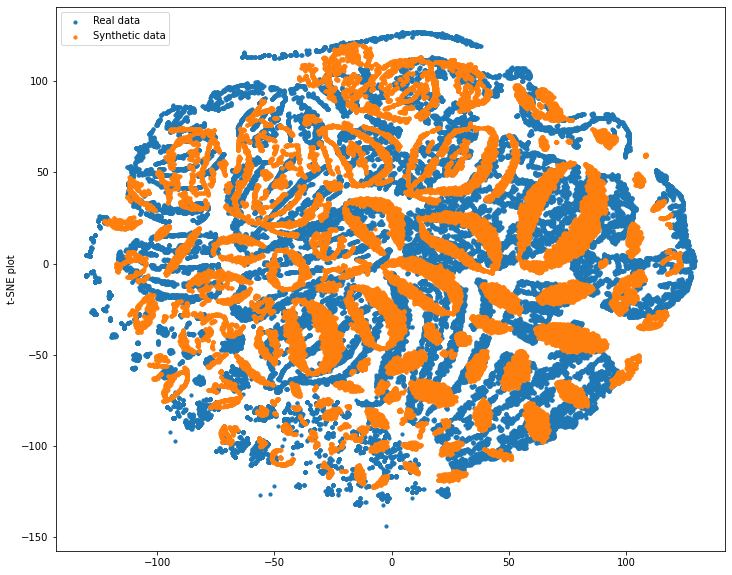

In [20]:
# third party
import matplotlib.pyplot as plt

plugin.plot(plt, loader)

plt.show()

# BenchMark

In [ ]:
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (plugin, plugin, {})
        for plugin in ["marginal_distributions", "ctgan", "adsgan", "tvae"]
    ],
    loader,
    synthetic_size=1000,
)

In [ ]:
Benchmarks.print(score)

In [56]:
len(horizons)

44952

In [57]:
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader
#static, temporal, horizons, outcome = GoogleStocksDataloader().load()

# Ensure that the number of rows in the static data matches the number of rows in the temporal data
static = static[:len(temporalss)]

loader = TimeSeriesDataLoader(
            temporal_data=dfs,
            observation_times=horizons,
            static_data=static,
            outcome=pd.DataFrame(outcome),
)

plugin = Plugins().get("timegan", n_iter = 1)
plugin.fit(loader)

plugin.generate(count = 10)

KeyError: 0